# 1. Install and import dependencies

Clone the Ultralytics YOLOv5 git repository: https://github.com/ultralytics/yolov5

In [12]:
import torch 
from matplotlib import pyplot as plt 
import numpy as np 
import cv2

# 2. Load model

In [13]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # Loading pretrained model, yolov5s was better suited for my computational power

Using cache found in /Users/eriklarsson/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-20 Python-3.9.17 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [14]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make detections

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0FiIgN85AzHqleBH8zoMxTkRhadsiI_J8Gg&usqp=CAU'
results = model(img)
results.print()

image 1/1: 183x275 21 cars, 4 trucks
Speed: 130.7ms pre-process, 78.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


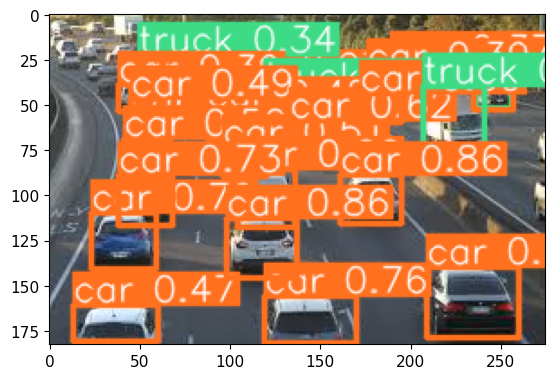

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

(1, 183, 275, 3)
(183, 275, 3)


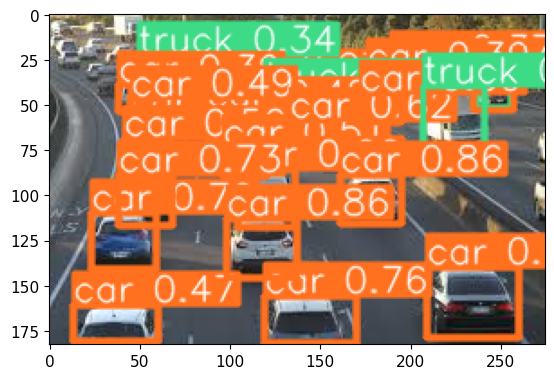

In [9]:
print(np.array(results.render()).shape)
print(np.squeeze(results.render()).shape)
plt.imshow(np.squeeze(results.render()))

# 4. Real time detections

In [15]:
cap = cv2.VideoCapture(0) # Can be 0, 1, 2 depending on device, to use video, replace 0 with the video ex: 'traffic.mp4'
cv2.startWindowThread()
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)
    cv2.imshow('YOLOv5', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(0)  # to close the window. Have to double click q.

113